In [1]:
!pip install transformers torch nltk matplotlib sentence-transformers --quiet


**Importing libraries**:os, nltk, matplotlib, transformers, sentence_transformers

Used for NLP tasks like tokenization, text processing, and visualization

---



nltk.download('punkt') → downloads tokenizer data for sentence splitting

In [2]:
import os
import nltk
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from sentence_transformers import SentenceTransformer, util

# Download tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Defines a function load_texts(file1, file2)

Opens two text files in read mode with UTF-8 encoding

Reads and returns their content as two strings

In [3]:
# Load two text files
def load_texts(file1, file2):
    with open(file1, 'r', encoding='utf-8') as f1, open(file2, 'r', encoding='utf-8') as f2:
        return f1.read(), f2.read()

Defines **summarize_with_model()** for text summarization

Loads a pretrained summarization model using Hugging Face pipeline

Generates and returns the summarized text with given length limits

In [4]:
# Summarization pipelines
def summarize_with_model(text, model_name, max_length=150, min_length=50):
    summarizer = pipeline("summarization", model=model_name)
    return summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']

Defines **paraphrase_with_model(**) to rephrase input text

Loads tokenizer and seq2seq model from Hugging Face

Encodes input, generates paraphrased output using sampling, and decodes it back to text

In [5]:
# Paraphrasing using seq2seq model
def paraphrase_with_model(text, model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    input_text = "paraphrase: " + text + " </s>"
    encoding = tokenizer.encode_plus(input_text, padding='longest', return_tensors="pt")
    outputs = model.generate(
        input_ids=encoding["input_ids"],
        attention_mask=encoding["attention_mask"],
        max_length=256,
        do_sample=True,
        top_k=120,
        top_p=0.95,
        num_return_sequences=1
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

Defines **similarity_score()** to measure how similar two texts are

Uses SentenceTransformer to get sentence embeddings

Returns cosine similarity score between original and generated text

In [6]:
# Similarity scoring
def similarity_score(original, generated):
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    emb1 = model.encode(original, convert_to_tensor=True)
    emb2 = model.encode(generated, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb1, emb2)[0])

**main()** runs the complete workflow

Loads **two text files** and stores them in a dictionary

Defines **multiple summarization and paraphrasing models**

**Generates summaries and paraphrases** for each text

Calculates **similarity scores** between original and generated texts

**Plots** bar charts comparing model similarity scores for visualization


--- Processing Text1 ---



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

T5 Summary:
the rapid advancements in artificial intelligence have sparked both excitement and concern . there are growing fears about the ethical implications, job displacement, and the potential misuse of AI technology . as society grapples with these challenges, it's clear that while AI has vast potential, its development must be approached with caution .



config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


BART Summary:
The rapid advancements in artificial intelligence have sparked both excitement and concern. On one hand, AI promises to revolutionize industries, from healthcare to finance, by improving efficiency, accuracy, and productivity. On the other hand, there are growing fears about the ethical implications, job displacement, and the potential misuse of AI technology. As society grapples with these challenges, it's clear that while AI has vast potential, its development must be approached with caution and responsibility.



config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Pegasus Summary:
In our series of letters from African journalists, film-maker, and columnist Ahmed Rashid looks at some of the key issues surrounding artificial intelligence and its potential impact on the world around us, as well as some of the best examples of how the technology is being used.



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

T5 Paraphrase:
If AI has the potential to change everything, it should be taken seriously and used as a tool of choice.



tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

BART Paraphrase:
Paraphrase: The rapid advancements in artificial intelligence have sparked both excitement and concern. On one hand, AI promises to revolutionize industries, from healthcare to finance, by improving efficiency, accuracy and productivity. On the other hand, there are growing fears about the ethical implications, job displacement and the potential misuse of AI technology.



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Pegasus Paraphrase:
The rapid advancements in artificial intelligence sparked both excitement and concern : on one hand, AI promises to revolutionize industries by improving efficiency, accuracy and productivity ; on the other hand, there are growing fears about ethical implications, job displacement and potential misuse of AI technology . As society grapples with these challenges , it's clear that while AI has vast potential , its development needs to be approached with caution and responsibility .


--- Processing Text2 ---



Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 123. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


T5 Summary:
the amazon rainforest is the largest tropical rainforest in the world . deforestation due to logging, agriculture, and mining is threatening this delicate ecosystem . Efforts are being made globally to protect the amazon, but challenges remain .



Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


BART Summary:
The Amazon rainforest, often referred to as the "lungs of the Earth," is the largest tropical rainforest in the world. It is home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. The forest also plays a vital role in regulating the global climate by absorbing large amounts of carbon dioxide. However, deforestation due to logging, agriculture, and mining is threatening this delicate ecosystem. Efforts are being made globally to protect the Amazon, but challenges remain due to political, economic, and social factors.



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Your max_length is set to 150, but your input_length is only 108. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)


Pegasus Summary:
The Amazon rainforest, often referred to as the "lungs of the Earth", is the largest tropical rainforest in the world, home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. The Amazon rainforest, often referred to as the "lungs of the Earth", is the largest tropical rainforest in the world, home to an incredibly diverse range of plant and animal species, many of which are found nowhere else.

T5 Paraphrase:
What is the lungs of the earth?

BART Paraphrase:
Paraphrase: The Amazon rainforest, often referred to as the lungs of the Earth, is home to an incredibly diverse range of plant and animal species, many of which are found nowhere else. But deforestation is threatening this delicate ecosystem.

Pegasus Paraphrase:
The Amazon rainforest, often referred to as the "lungs of the earth," is the largest tropical rainforest in the world . It is home to an incredibly diverse range of plants and animal species, many of which ar

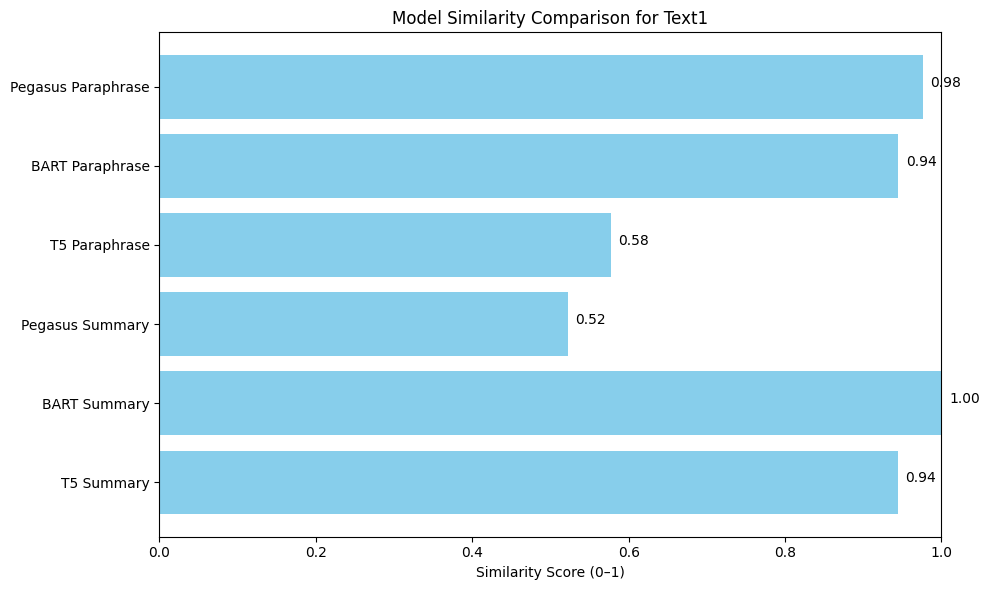

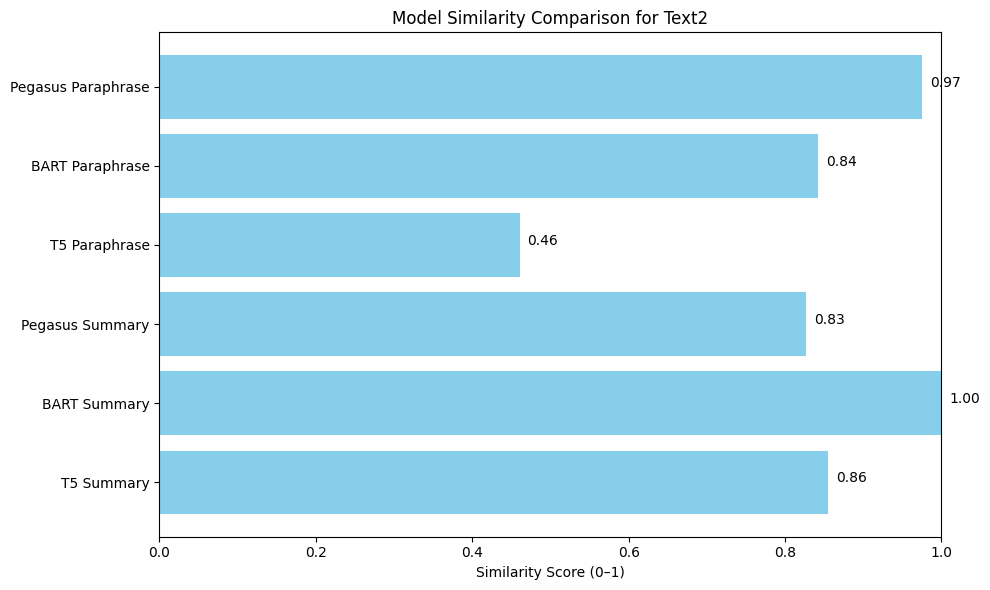

In [7]:
# Main workflow
def main():
    file1 = "Sample1.txt"
    file2 = "Sample2.txt"
    text1, text2 = load_texts(file1, file2)

    inputs = {"Text1": text1, "Text2": text2}

    # Models
    summarization_models = {
        "T5": "t5-base",
        "BART": "facebook/bart-base",
        "Pegasus": "google/pegasus-xsum"
    }

    paraphrasing_models = {
        "T5": "ramsrigouthamg/t5_paraphraser",
        "BART": "eugenesiow/bart-paraphrase",
        "Pegasus": "Vamsi/T5_Paraphrase_Paws"
    }

    results = {}

    # Apply models
    for name, text in inputs.items():
        results[name] = {"summary": {}, "paraphrase": {}, "similarity": {}}

        print(f"\n--- Processing {name} ---\n")

        # Summarization
        for model_name, model_path in summarization_models.items():
            summary = summarize_with_model(text, model_path)
            sim = similarity_score(text, summary)
            results[name]["summary"][model_name] = summary
            results[name]["similarity"][f"{model_name} Summary"] = sim
            print(f"{model_name} Summary:\n{summary}\n")

        # Paraphrasing
        for model_name, model_path in paraphrasing_models.items():
            paraphrase = paraphrase_with_model(text, model_path)
            sim = similarity_score(text, paraphrase)
            results[name]["paraphrase"][model_name] = paraphrase
            results[name]["similarity"][f"{model_name} Paraphrase"] = sim
            print(f"{model_name} Paraphrase:\n{paraphrase}\n")

    # Plotting results
    for text_key in inputs:
        similarities = results[text_key]["similarity"]
        labels = list(similarities.keys())
        scores = list(similarities.values())
        plt.figure(figsize=(10, 6))
        plt.barh(labels, scores, color='skyblue')
        plt.xlabel("Similarity Score (0–1)")
        plt.title(f"Model Similarity Comparison for {text_key}")
        plt.xlim(0, 1)
        for index, value in enumerate(scores):
            plt.text(value + 0.01, index, f"{value:.2f}")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()